In [ ]:
import numpy as np

import matplotlib.pyplot as plt
# 1D/2D convolution (합성곱) 연산을 사용하여 간단한 필터링, 노이즈 제거, 에지 검출 등을 수행하는 과정
# 이미지 처리의 기초 개념 중 하나인 convolution을 직접 구현한 예제

In [ ]:
# 1D Sequence
# 1D 입력 신호 (시퀀스)를 정의
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# simple finite difference filter (meaning?)
# 미분(gradient)을 근사하는 필터로로, 중앙값 기준 앞뒤 차이를 계산하여 변화율(기울기) 을 측정
# 일반적으로 에지 검출 또는 기울기 계산에 사용됨
w = np.array([-1/2, 0, 1/2])

In [ ]:
# 1D convolution을 수동으로 구현한 함수
# 입력 시퀀스에서 w와 같은 길이의 부분을 슬라이딩 하며 각 위치에 대해 내적(합성곱)을 수행
def conv1d(x, w):
    n_x = len(x)
    n_w = len(w)
    n_out = n_x - n_w + 1

    output = np.zeros(n_out)

    for i in range(n_out):
        segment = x[i:i+n_w]
        output[i] = np.sum(segment * w)

    return output

In [ ]:
y = conv1d(x, w) # Can you guess the meaning of output?
# 결과: 입력 x의 각 지점에서 변화량(gradient)을 추정한 값
# 중심차분을 통해 기울기를 계산한 결과
print("Output:", y)

Output: [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
conv1d(y,w)
# 기울기 값을 다시 미분하면 이차 도함수, 즉 곡률(curvature) 에 가까운 결과가 나옴

array([0., 0., 0., 0., 0.])

In [ ]:
# 1D Sequence with noise
# 랜덤한 노이즈가 추가된 1D 데이터 시퀀스를 생성
np.random.seed(1)
x = np.array([-5,-4,-3,-2,0,1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12])
x = x + np.random.randn(len(x))
# 평균 필터 (moving average filter): 노이즈 제거에 자주 사용됨
w = np.array([1/5, 1/5, 1/5,1/5,1/5])

In [7]:
x

array([-3.37565464, -4.61175641, -3.52817175, -3.07296862,  0.86540763,
       -1.3015387 ,  3.74481176,  2.2387931 ,  4.3190391 ,  4.75062962,
        7.46210794,  4.93985929,  7.6775828 ,  8.61594565, 11.13376944,
        9.90010873, 11.82757179])

In [ ]:
y = conv1d(x, w) # Can you guess the meaning of output?
# 노이즈가 포함된 데이터를 5개의 평균으로 평활화하여 부드럽게 만듦
print("Output:", y)

Output: [-2.74462876 -2.32980557 -0.65849194  0.49490103  1.97330258  2.75034698
  4.5030763   4.74208581  5.82984375  6.68922506  7.96585302  8.45345318
  9.83099568]


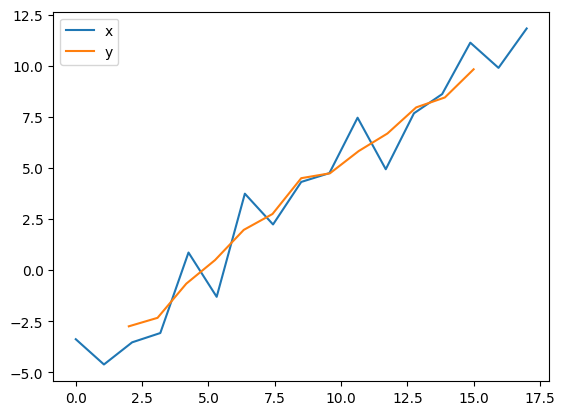

In [ ]:
# 원래 데이터 x와 필터링된 데이터 y를 함께 시각화
plt.plot(np.linspace(0,len(x),len(x)), x, label='x')
plt.plot(np.linspace(2,len(x)-len(w)+1+2,len(x)-len(w)+1), y, label='y')
plt.legend()

In [ ]:
# 2D (image) dataset
# 간단한 5x5 이미지 배열을 정의
x = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 1],
    [1, 0, 1, 2, 0],
    [2, 1, 0, 1, 3],
    [0, 1, 2, 1, 0]
])

# 3x3 filter (Sobel operator)
# Sobel 필터 (x방향): 수평 방향의 에지를 검출하는 필터
k = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

cf) Sobel operator for edge detection https://en.wikipedia.org/wiki/Sobel_operator

In [ ]:
def conv2d(x, k):
    # 2D convolution 함수: 입력 이미지 x에 대해 필터 k를 적용하여 합성곱 결과를 반환
    h_img, w_img = x.shape
    h_ker, w_ker = k.shape

    h_out = h_img - h_ker + 1
    w_out = w_img - w_ker + 1

    output = np.zeros((h_out, w_out))

    for i in range(h_out):
        for j in range(w_out):
            region = x[i:i+h_ker, j:j+w_ker]
            output[i, j] = np.sum(region * k)

    return output

In [ ]:
output = conv2d(x, k)
# x 이미지의 에지(gradient)를 추출
print("x:")
print(x)
print("Convolution output:")
print(output)

x:
[[1 2 3 0 1]
 [0 1 2 3 1]
 [1 0 1 2 0]
 [2 1 0 1 3]
 [0 1 2 1 0]]
Convolution output:
[[ 6.  4. -5.]
 [ 0.  6.  0.]
 [-2.  2.  3.]]


In [13]:
from PIL import Image
from io import BytesIO

download image from https://upload.wikimedia.org/wikipedia/commons/f/f0/Valve_original_%281%29.PNG

In [ ]:
img = Image.open("Valve_original_(1).png").convert('L') #gray scale
# 이미지를 불러와서 흑백(Grayscale)으로 변환

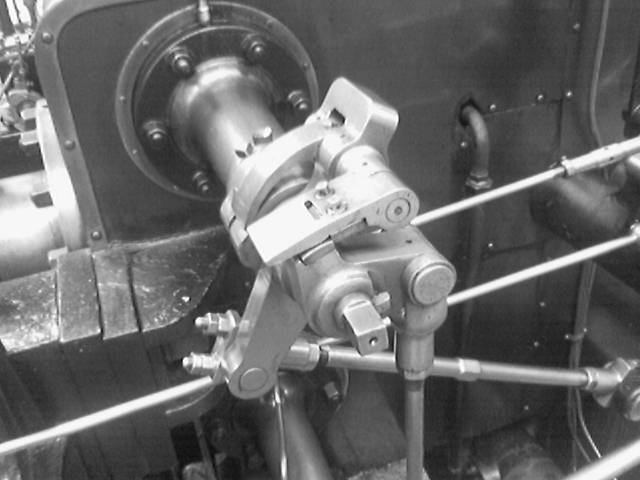

In [16]:
img

In [ ]:
img_np = np.array(img)
# 이미지를 NumPy 배열로 변환

In [18]:
img_np.shape

(480, 640)

array([[109, 109, 104, ...,  72,  70,  68],
       [113, 110, 107, ...,  73,  71,  69],
       [115, 107, 108, ...,  74,  73,  71],
       ...,
       [129, 137, 139, ...,  81,  79,  78],
       [129, 143, 153, ...,  80,  80,  80],
       [129, 149, 166, ...,  80,  81,  81]], dtype=uint8)
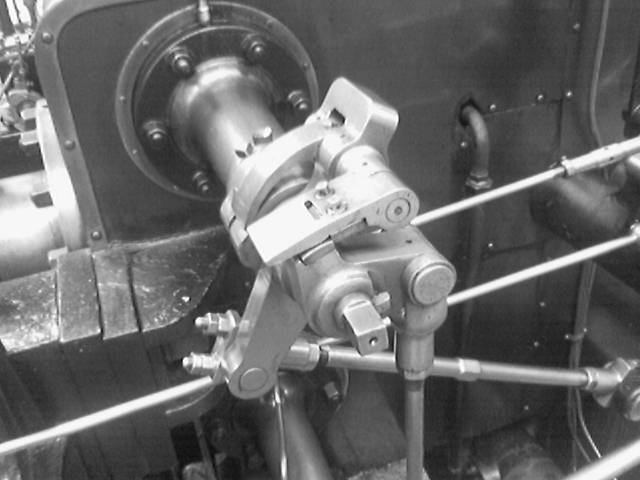

In [19]:
img_np

In [ ]:
img_filter = conv2d(img_np,k)
# Sobel 필터를 적용해 에지 검출을 수행하고 시각화

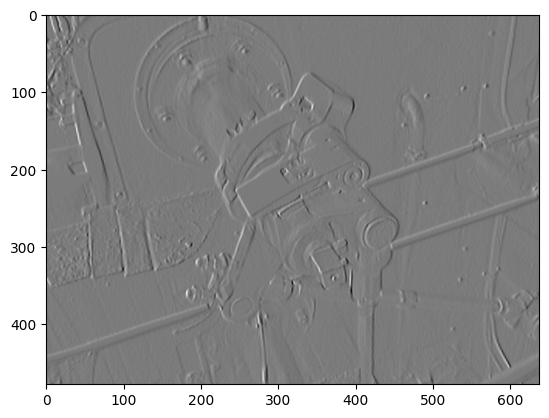

In [21]:
plt.imshow(img_filter, cmap='gray')

In [22]:
img = Image.open("Valve_original_(1).png")

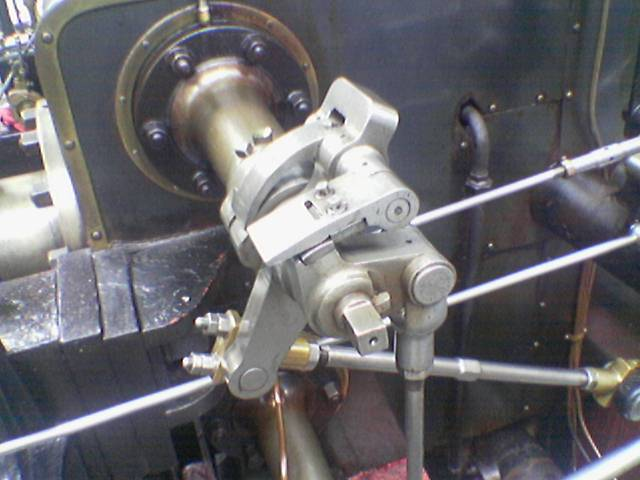

In [23]:
img

In [ ]:
img_np = np.array(img)
# 원래 이미지를 RGB 컬러로 불러옴옴

In [25]:
img_np.shape

(480, 640, 3)

array([[[ 99, 111, 125],
        [101, 110, 125],
        [ 97, 104, 120],
        ...,
        [ 65,  76,  70],
        [ 63,  74,  68],
        [ 61,  72,  66]],

       [[103, 115, 129],
        [102, 111, 126],
        [100, 107, 123],
        ...,
        [ 66,  77,  71],
        [ 64,  75,  69],
        [ 62,  73,  67]],

       [[105, 117, 129],
        [ 99, 109, 121],
        [101, 108, 124],
        ...,
        [ 66,  78,  74],
        [ 66,  77,  73],
        [ 64,  75,  71]],

       ...,

       [[125, 126, 154],
        [131, 135, 160],
        [133, 138, 160],
        ...,
        [ 88,  78,  77],
        [ 86,  76,  75],
        [ 84,  76,  74]],

       [[125, 126, 154],
        [137, 141, 166],
        [147, 152, 172],
        ...,
        [ 86,  78,  75],
        [ 86,  79,  73],
        [ 84,  79,  73]],

       [[125, 126, 154],
        [143, 147, 172],
        [160, 165, 185],
        ...,
        [ 86,  79,  73],
        [ 85,  81,  72],
        [ 85,  81,  72]]], dtype=uint8)
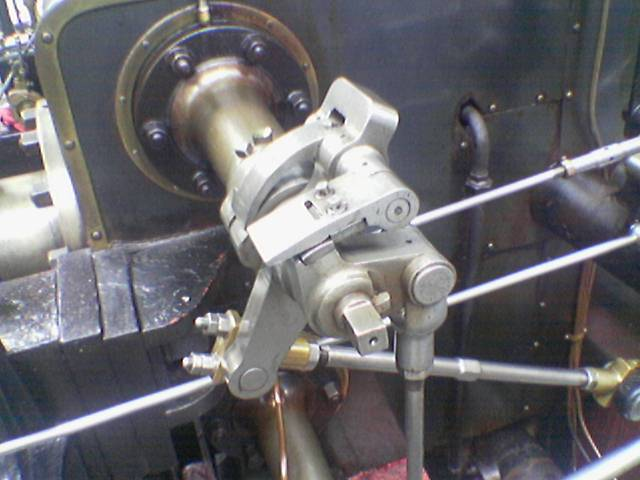

In [26]:
img_np

In [27]:
# 3x3 filter (Sobel operator)
k = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

In [ ]:
img_r1 = conv2d(img_np[:,:,0],k)
img_g1 = conv2d(img_np[:,:,1],k)
img_b1 = conv2d(img_np[:,:,2],k)
img_filter1 = np.stack((img_r1,img_g1,img_b1),axis=2)
# 각 채널(R/G/B)에 대해 Sobel 필터(k)를 적용하여 수평 에지를 추출

img_r2 = conv2d(img_np[:,:,0],k.T)
img_g2 = conv2d(img_np[:,:,1],k.T)
img_b2 = conv2d(img_np[:,:,2],k.T)
img_filter2 = np.stack((img_r2,img_g2,img_b2),axis=2)
# 필터를 전치(transpose)하여 수직 방향 에지를 추출

In [ ]:
img_filter = np.sqrt(img_filter1**2+img_filter2**2)
# x, y 방향 에지를 합쳐서 최종 에지 강도(gradient magnitude)를 계산

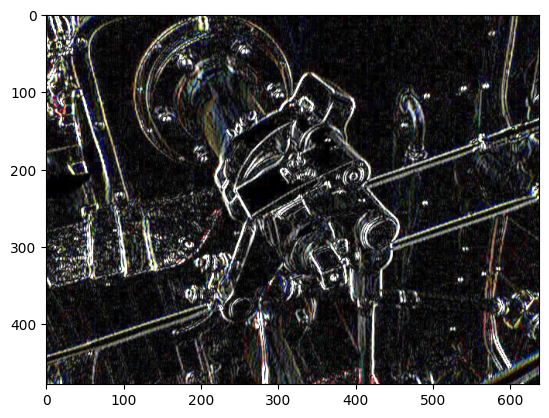

In [ ]:
plt.imshow(np.clip(img_filter / 255.0, 0, 1))  # normalize + RGB
# 결과 이미지를 0~1 범위로 정규화하고 시각화함함